In [1]:
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter


In [2]:
# Load the JSON file
with open('intents.json', 'r') as file:
    data = json.load(file)

# Check the structure of the data
print(data)

{'intents': [{'tag': 'greeting', 'patterns': ['Hi', 'Hey', 'Is anyone there?', 'Hi there', 'Hello', 'Hey there', 'Howdy', 'Hola', 'Bonjour', 'Konnichiwa', 'Guten tag', 'Ola'], 'responses': ['Hello there. Tell me how are you feeling today?', 'Hi there. What brings you here today?', 'Hi there. How are you feeling today?', 'Great to see you. How do you feel currently?', "Hello there. Glad to see you're back. What's going on in your world right now?"]}, {'tag': 'morning', 'patterns': ['Good morning'], 'responses': ["Good morning. I hope you had a good night's sleep. How are you feeling today? "]}, {'tag': 'afternoon', 'patterns': ['Good afternoon'], 'responses': ['Good afternoon. How is your day going?']}, {'tag': 'evening', 'patterns': ['Good evening'], 'responses': ['Good evening. How has your day been?']}, {'tag': 'night', 'patterns': ['Good night'], 'responses': ['Good night. Get some proper sleep', 'Good night. Sweet dreams.']}, {'tag': 'goodbye', 'patterns': ['Bye', 'See you later', 

In [3]:
# Extract patterns and responses
patterns = []
responses = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern)
    for response in intent['responses']:
        responses.append(response)

# Check the patterns and responses
print("Patterns:", patterns)
print("Responses:", responses)

Patterns: ['Hi', 'Hey', 'Is anyone there?', 'Hi there', 'Hello', 'Hey there', 'Howdy', 'Hola', 'Bonjour', 'Konnichiwa', 'Guten tag', 'Ola', 'Good morning', 'Good afternoon', 'Good evening', 'Good night', 'Bye', 'See you later', 'Goodbye', 'Au revoir', 'Sayonara', 'ok bye', 'Bye then', 'Fare thee well', 'Thanks', 'Thank you', "That's helpful", 'Thanks for the help', 'Than you very much', '', 'nothing much', 'Who are you?', 'What are you?', 'Who you are?', 'Tell me more about yourself.', 'What is your name?', 'What should I call you?', "What's your name?", 'Tell me about yourself', 'What can you do?', 'Who created you?', 'How were you made?', 'How were you created?', 'My name is ', 'I am name.', 'I go by ', 'Could you help me?', 'give me a hand please', 'Can you help?', 'What can you do for me?', 'I need support', 'I need help', 'Support me please', 'I am feeling lonely', 'I am so lonely', 'I feel down', 'I feel sad', 'I am sad', 'I feel so lonely', 'I feel empty', "I don't have anyone",

In [4]:
# Download necessary nltk data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize words
    tokens = word_tokenize(text)
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    return tokens

# Preprocess the patterns
processed_patterns = [preprocess_text(pattern) for pattern in patterns]
print("Processed Patterns:", processed_patterns)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processed Patterns: [['hi'], ['hey'], ['anyone'], ['hi'], ['hello'], ['hey'], ['howdy'], ['hola'], ['bonjour'], ['konnichiwa'], ['guten', 'tag'], ['ola'], ['good', 'morning'], ['good', 'afternoon'], ['good', 'evening'], ['good', 'night'], ['bye'], ['see', 'later'], ['goodbye'], ['au', 'revoir'], ['sayonara'], ['ok', 'bye'], ['bye'], ['fare', 'thee', 'well'], ['thanks'], ['thank'], ['helpful'], ['thanks', 'help'], ['much'], [], ['nothing', 'much'], [], [], [], ['tell'], ['name'], ['call'], ['name'], ['tell'], [], ['created'], ['made'], ['created'], ['name'], ['name'], ['go'], ['could', 'help'], ['give', 'hand', 'please'], ['help'], [], ['need', 'support'], ['need', 'help'], ['support', 'please'], ['feeling', 'lonely'], ['lonely'], ['feel'], ['feel', 'sad'], ['sad'], ['feel', 'lonely'], ['feel', 'empty'], ['anyone'], ['stressed'], ['stressed'], ['feel', 'stuck'], ['still', 'feel', 'stressed'], ['burned'], ['feel', 'worthless'], ['one', 'likes'], ['ca', 'anything'], ['useless'], ['nothing

In [5]:
# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Preprocess text using spaCy
def spacy_preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return tokens

# Preprocess patterns using spaCy
processed_patterns_spacy = [spacy_preprocess(pattern) for pattern in patterns]
print("Processed Patterns (spaCy):", processed_patterns_spacy)

Processed Patterns (spaCy): [['hi'], ['hey'], [], ['hi'], ['hello'], ['hey'], ['howdy'], ['hola'], ['bonjour'], ['konnichiwa'], ['guten', 'tag'], ['ola'], ['good', 'morning'], ['good', 'afternoon'], ['good', 'evening'], ['good', 'night'], ['bye'], ['later'], ['goodbye'], ['au', 'revoir'], ['sayonara'], ['ok', 'bye'], ['bye'], ['fare', 'thee'], ['thank'], ['thank'], ['helpful'], ['thank', 'help'], [], [], [], [], [], [], ['tell'], [], [], [], ['tell'], [], ['create'], [], ['create'], [], [], [], ['help'], ['hand'], ['help'], [], ['need', 'support'], ['need', 'help'], ['support'], ['feel', 'lonely'], ['lonely'], ['feel'], ['feel', 'sad'], ['sad'], ['feel', 'lonely'], ['feel'], [], ['stress'], ['stressed'], ['feel', 'stuck'], ['feel', 'stress'], ['burn'], ['feel', 'worthless'], ['like'], [], ['useless'], ['make', 'sense', 'anymore'], ['anymore'], ['depressed'], ['think', 'depressed'], ['depression'], ['feel', 'great', 'today'], ['happy'], ['feel', 'happy'], ['good'], ['cheerful'], ['fine'

c:\Users\Ayman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


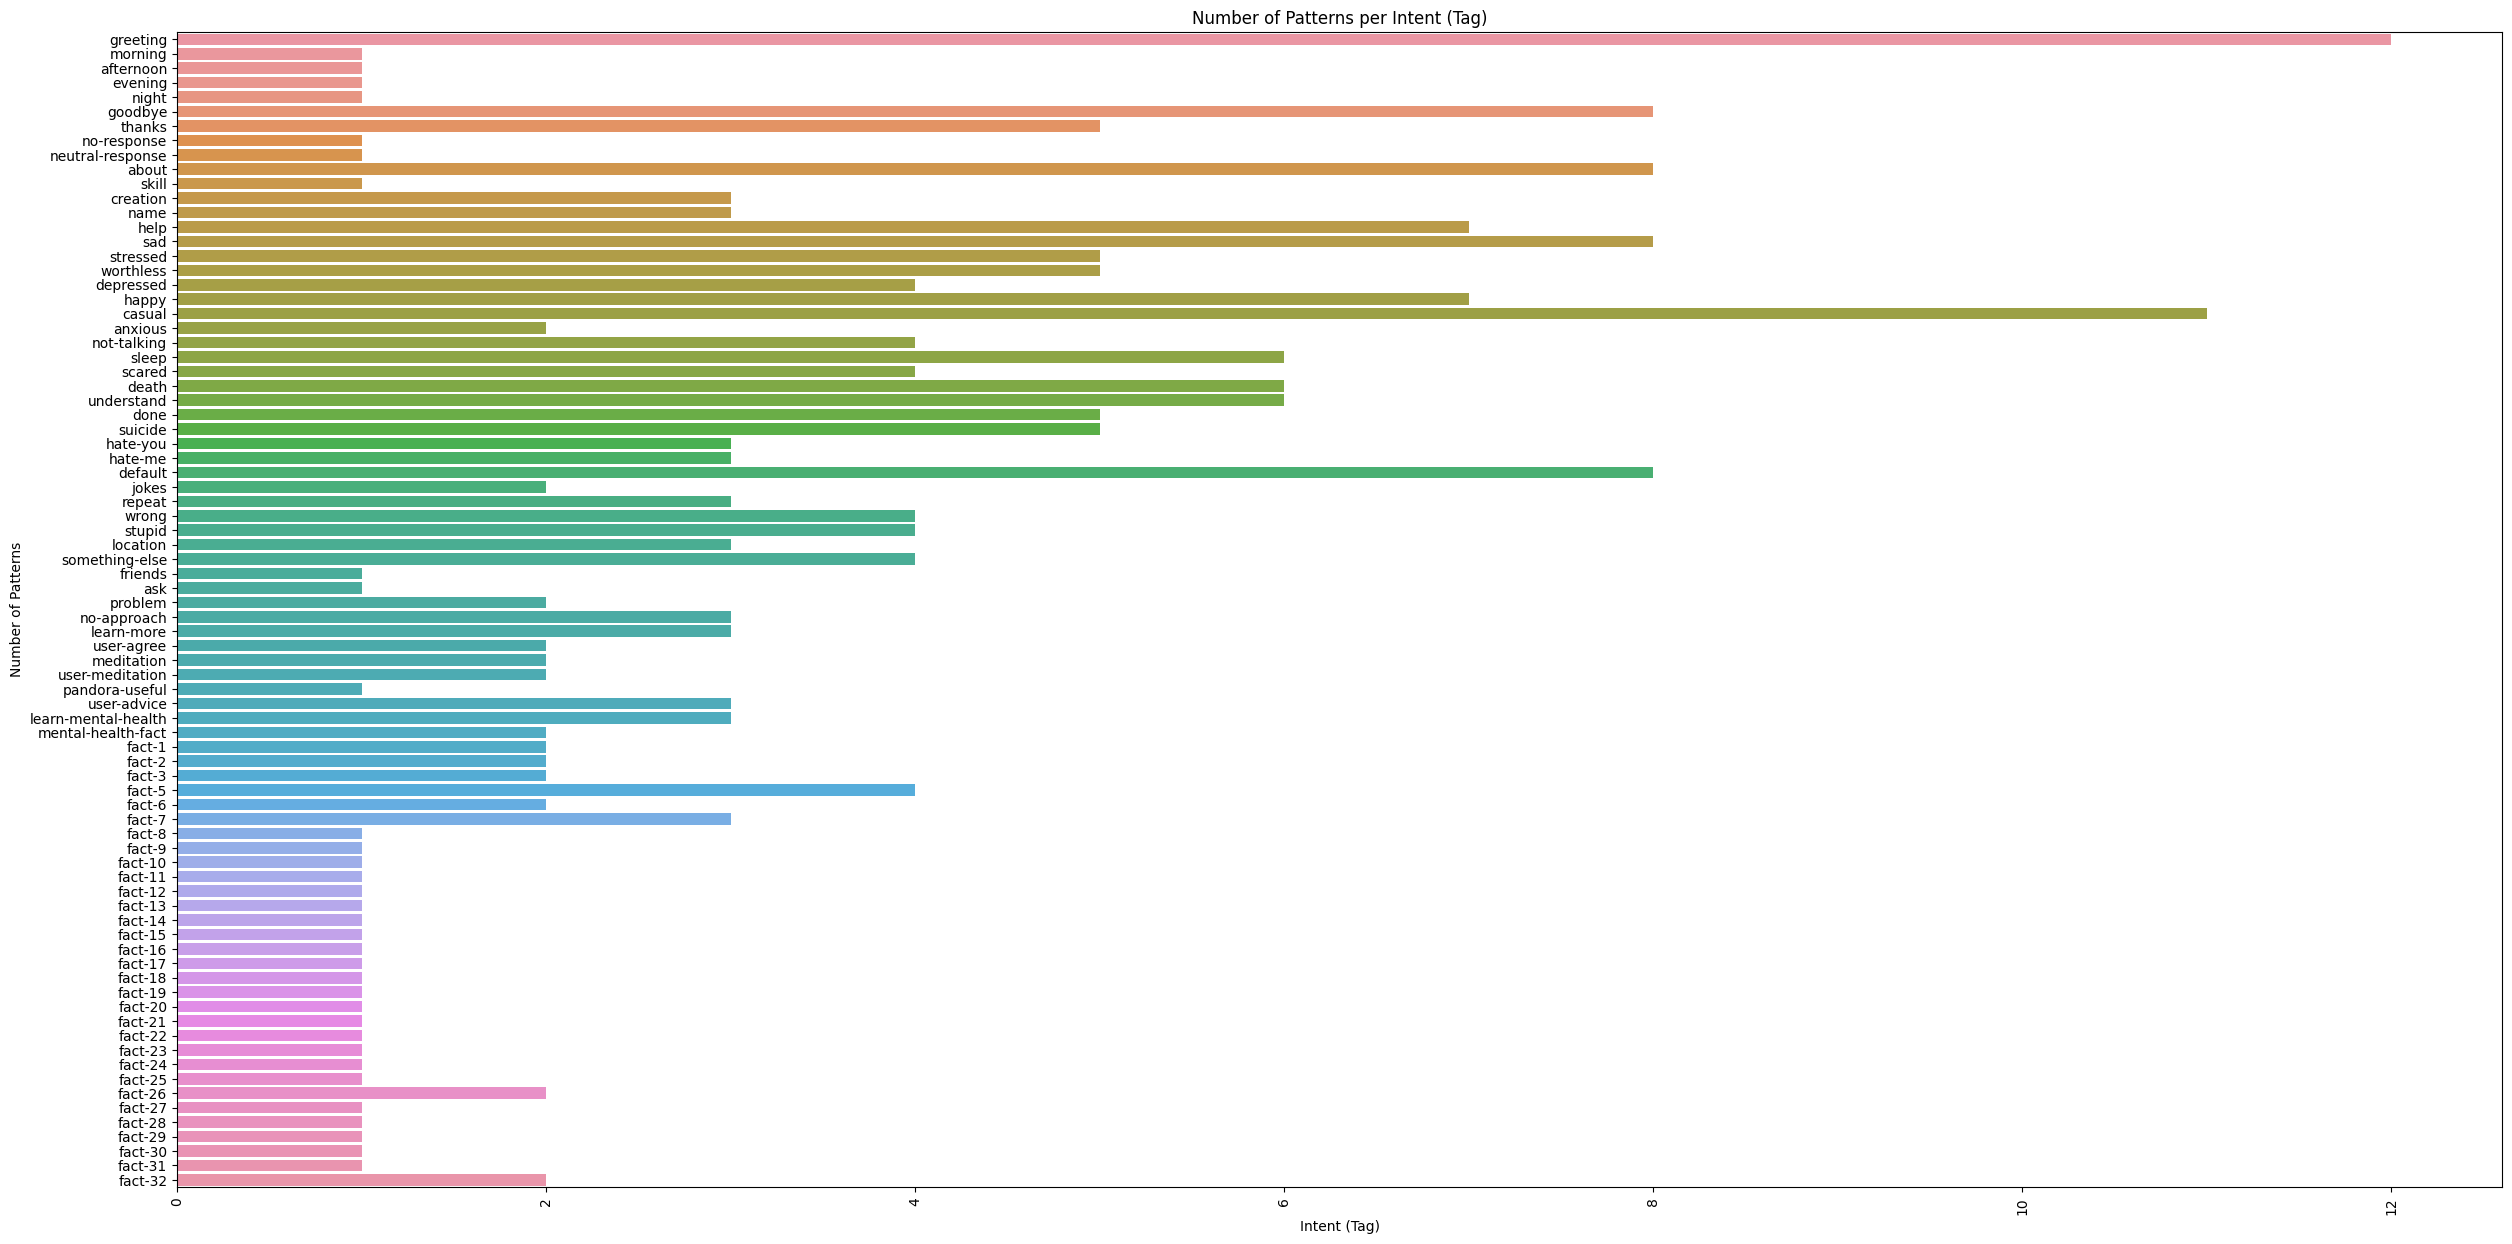

In [6]:
# Count the number of patterns per intent
intent_counts = {intent['tag']: len(intent['patterns']) for intent in data['intents']}

# Visualize the intent distribution
plt.figure(figsize=(30, 15))
sns.barplot(y=list(intent_counts.keys()), x=list(intent_counts.values()))
plt.xticks(rotation=90)
plt.title("Number of Patterns per Intent (Tag)")
plt.ylabel("Number of Patterns")
plt.xlabel("Intent (Tag)")
plt.show()

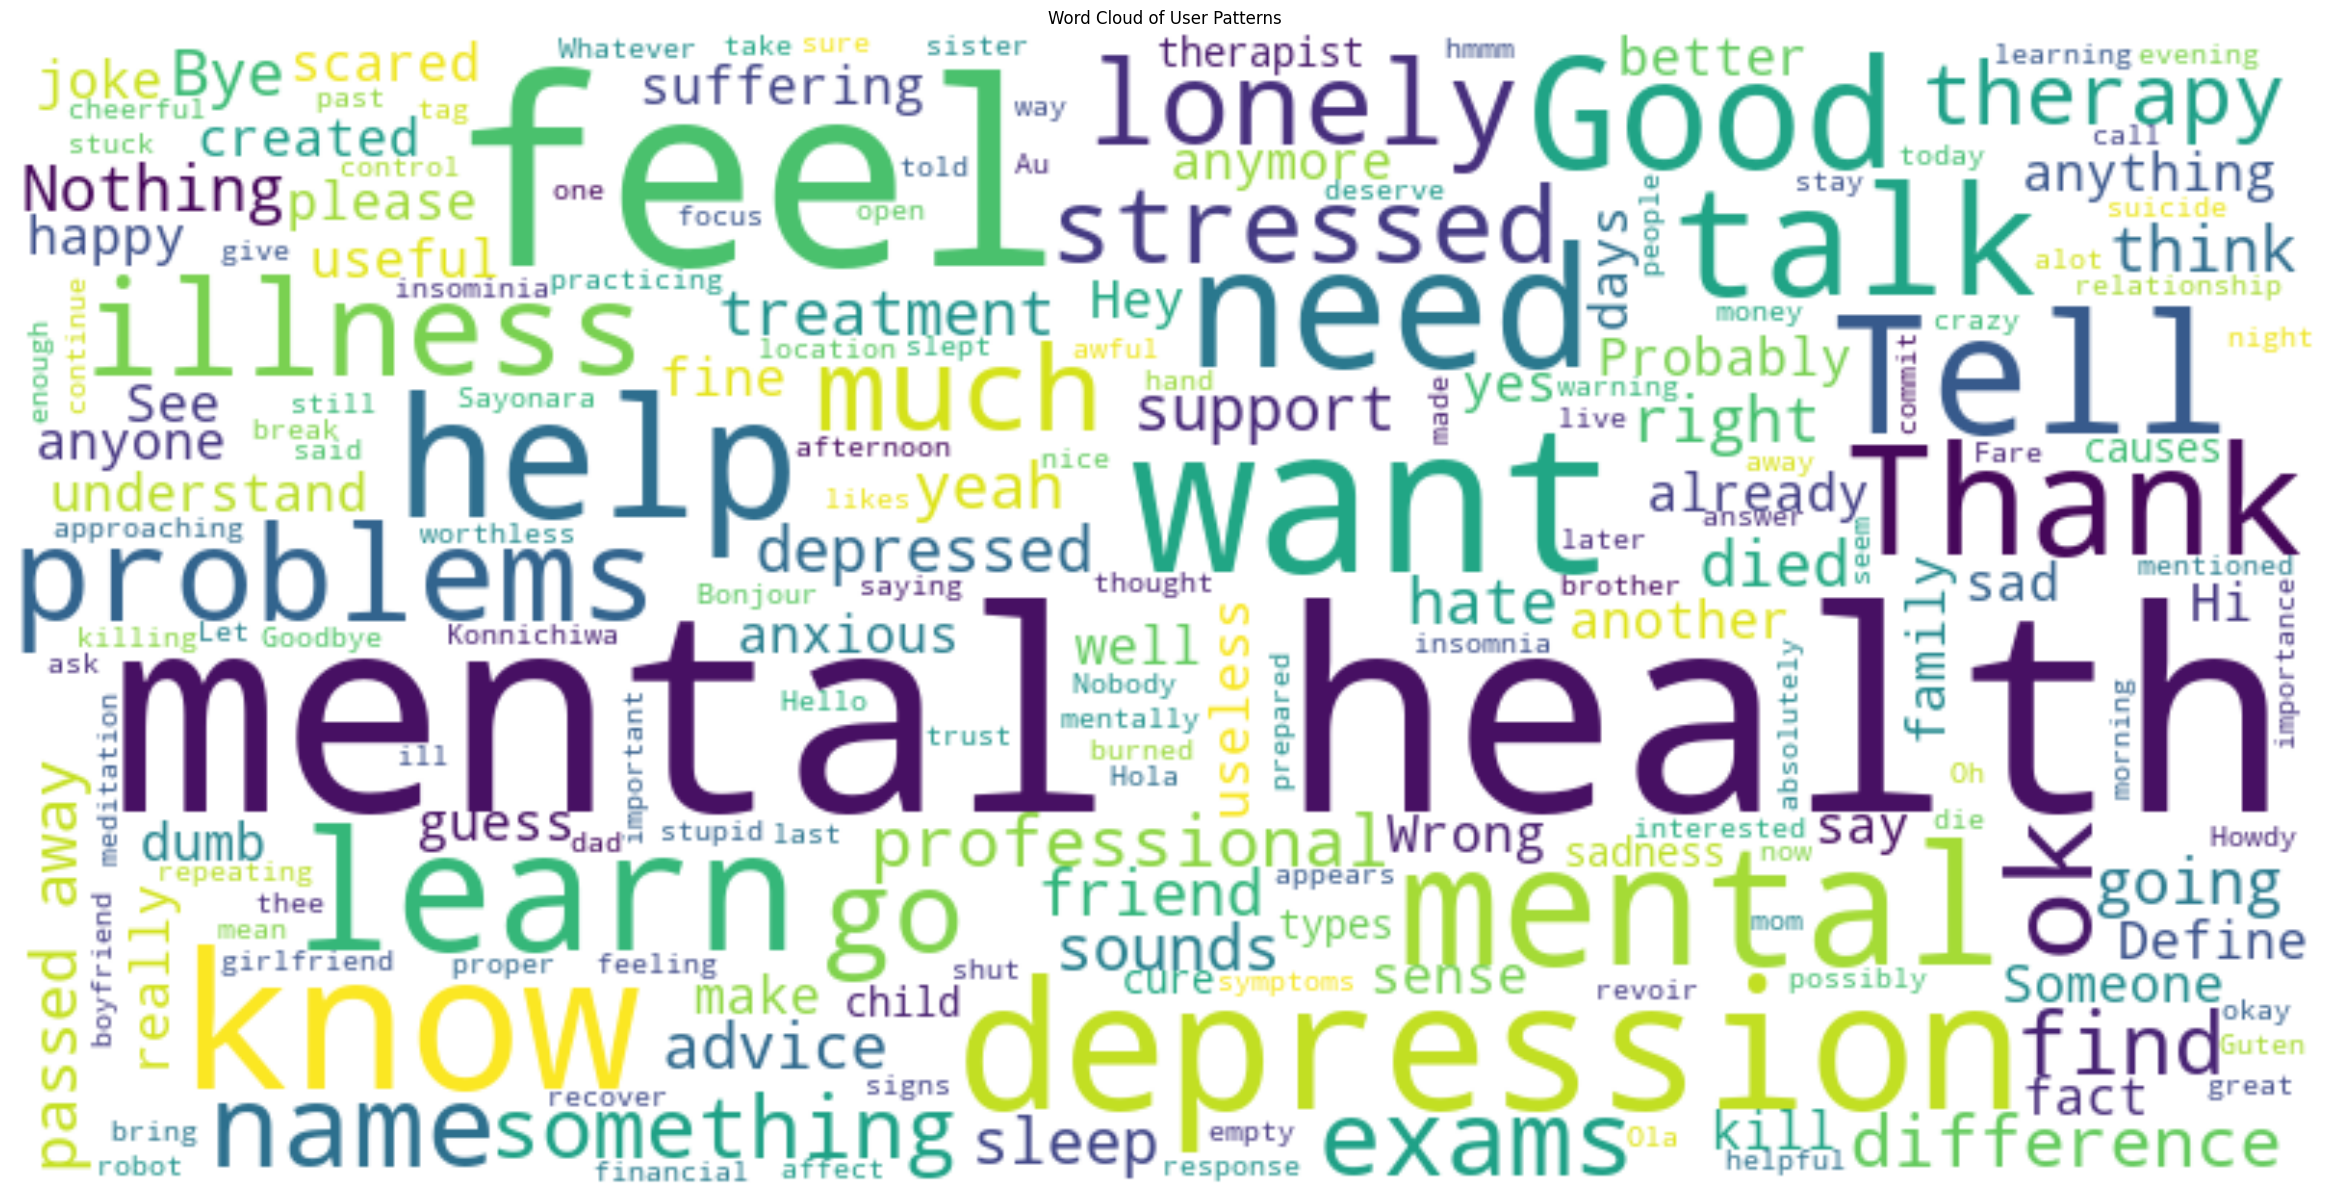

In [7]:
# Combine all patterns into a single string
all_patterns = ' '.join(pattern for pattern in patterns)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_patterns)

# Display the word cloud
plt.figure(figsize=(30, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of User Patterns")
plt.show()

c:\Users\Ayman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


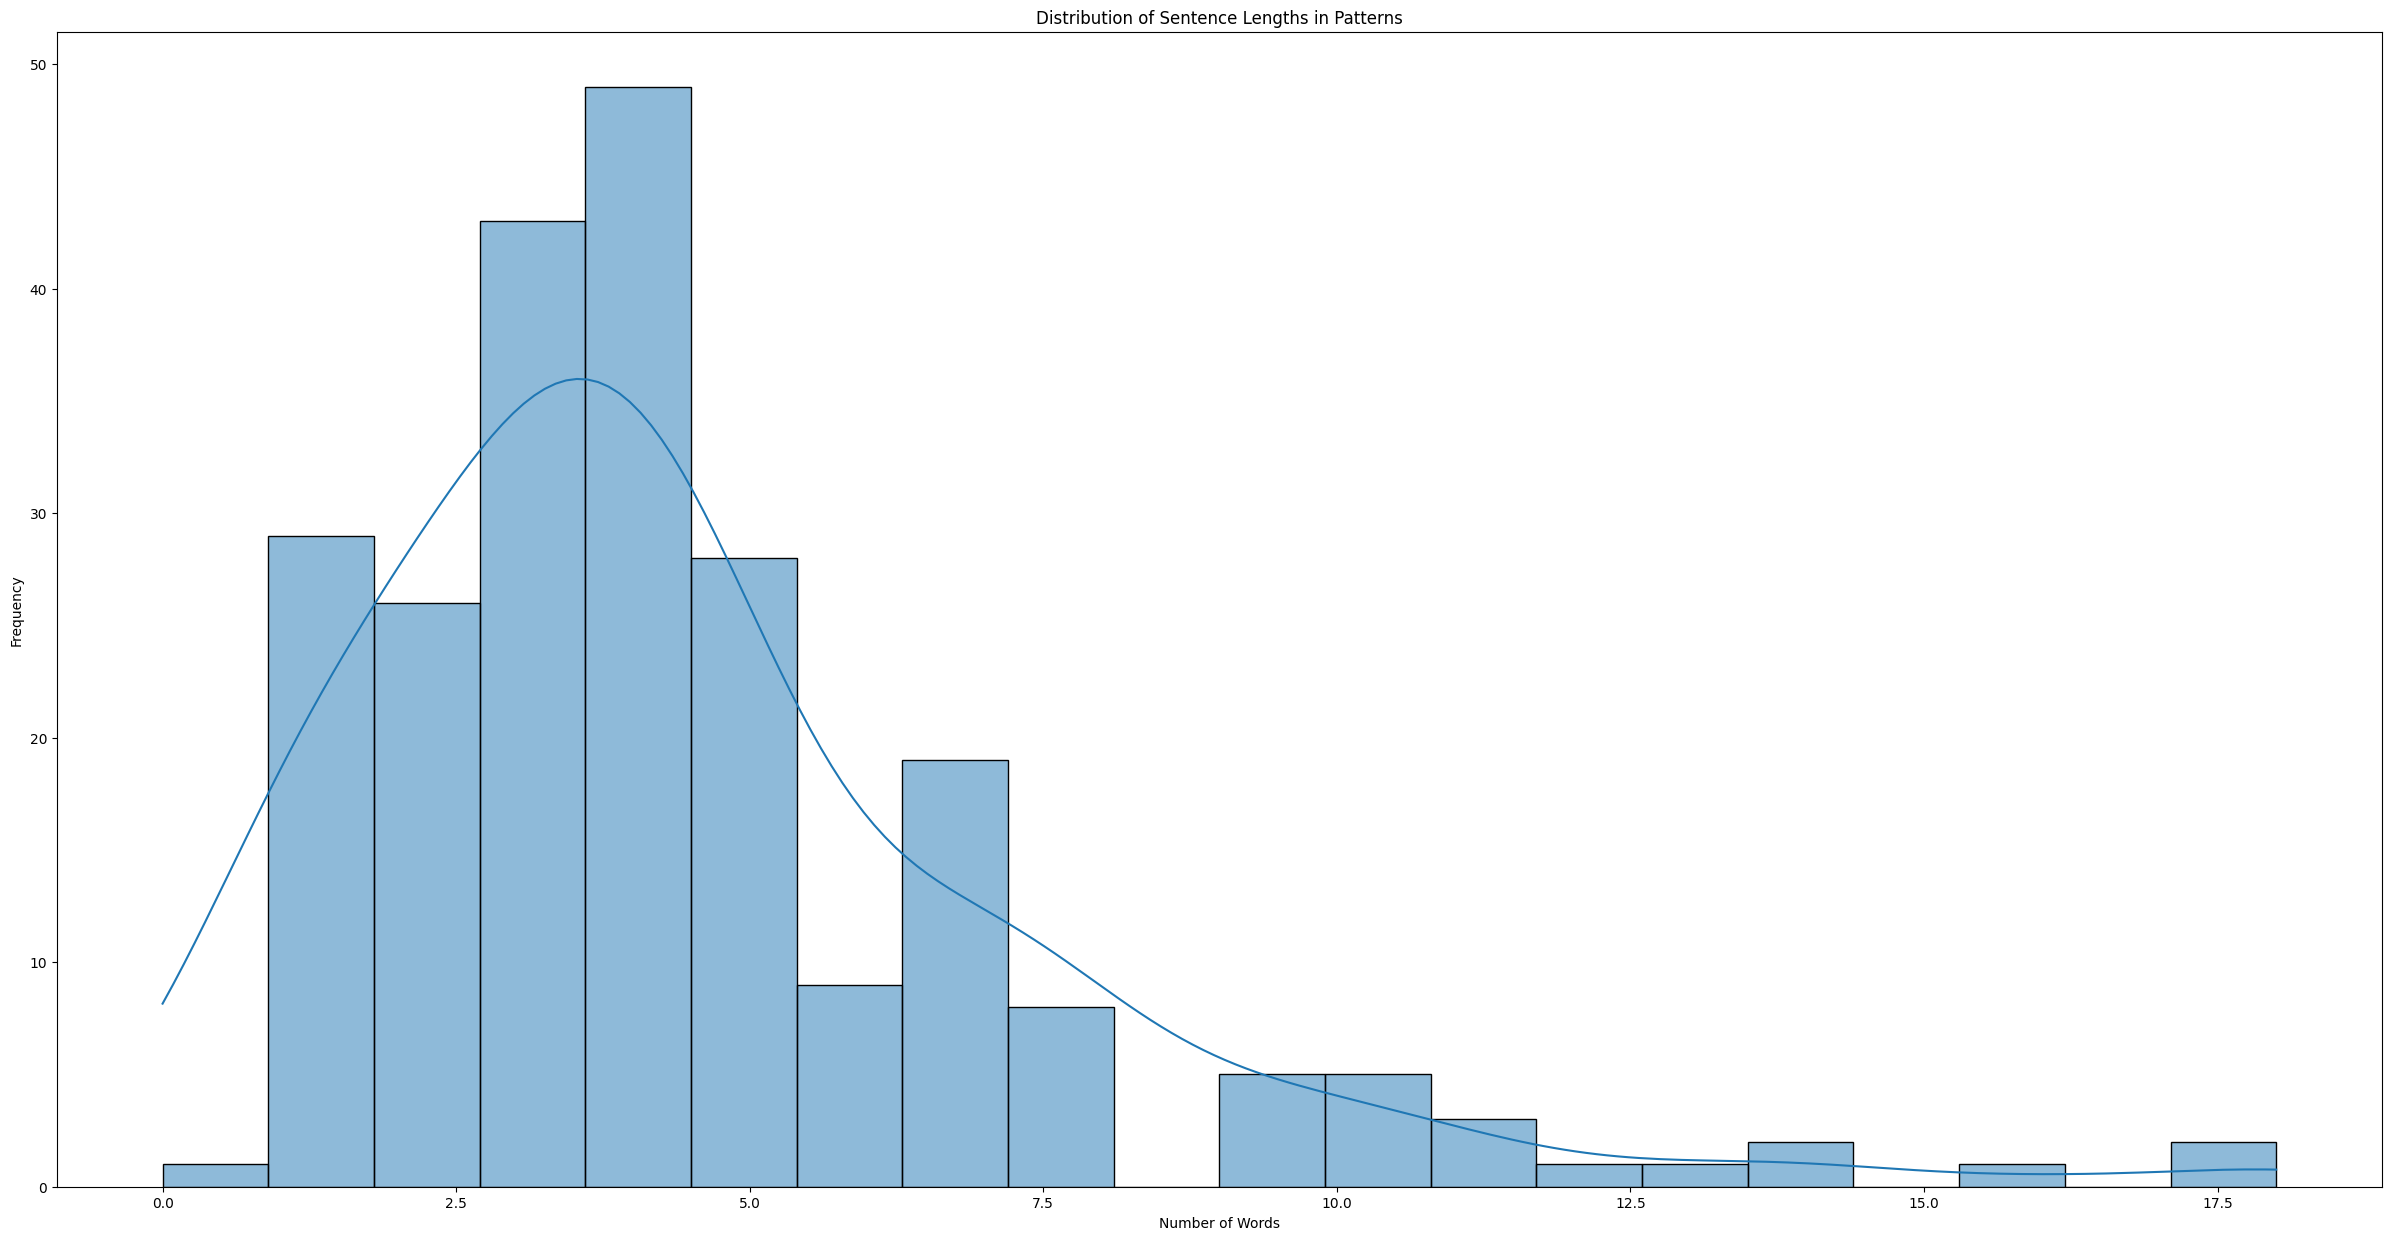

In [8]:
# Calculate the length of each pattern
pattern_lengths = [len(pattern.split()) for pattern in patterns]

# Visualize the sentence length distribution
plt.figure(figsize=(30, 15))
sns.histplot(pattern_lengths, bins=20, kde=True)
plt.title("Distribution of Sentence Lengths in Patterns")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

c:\Users\Ayman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


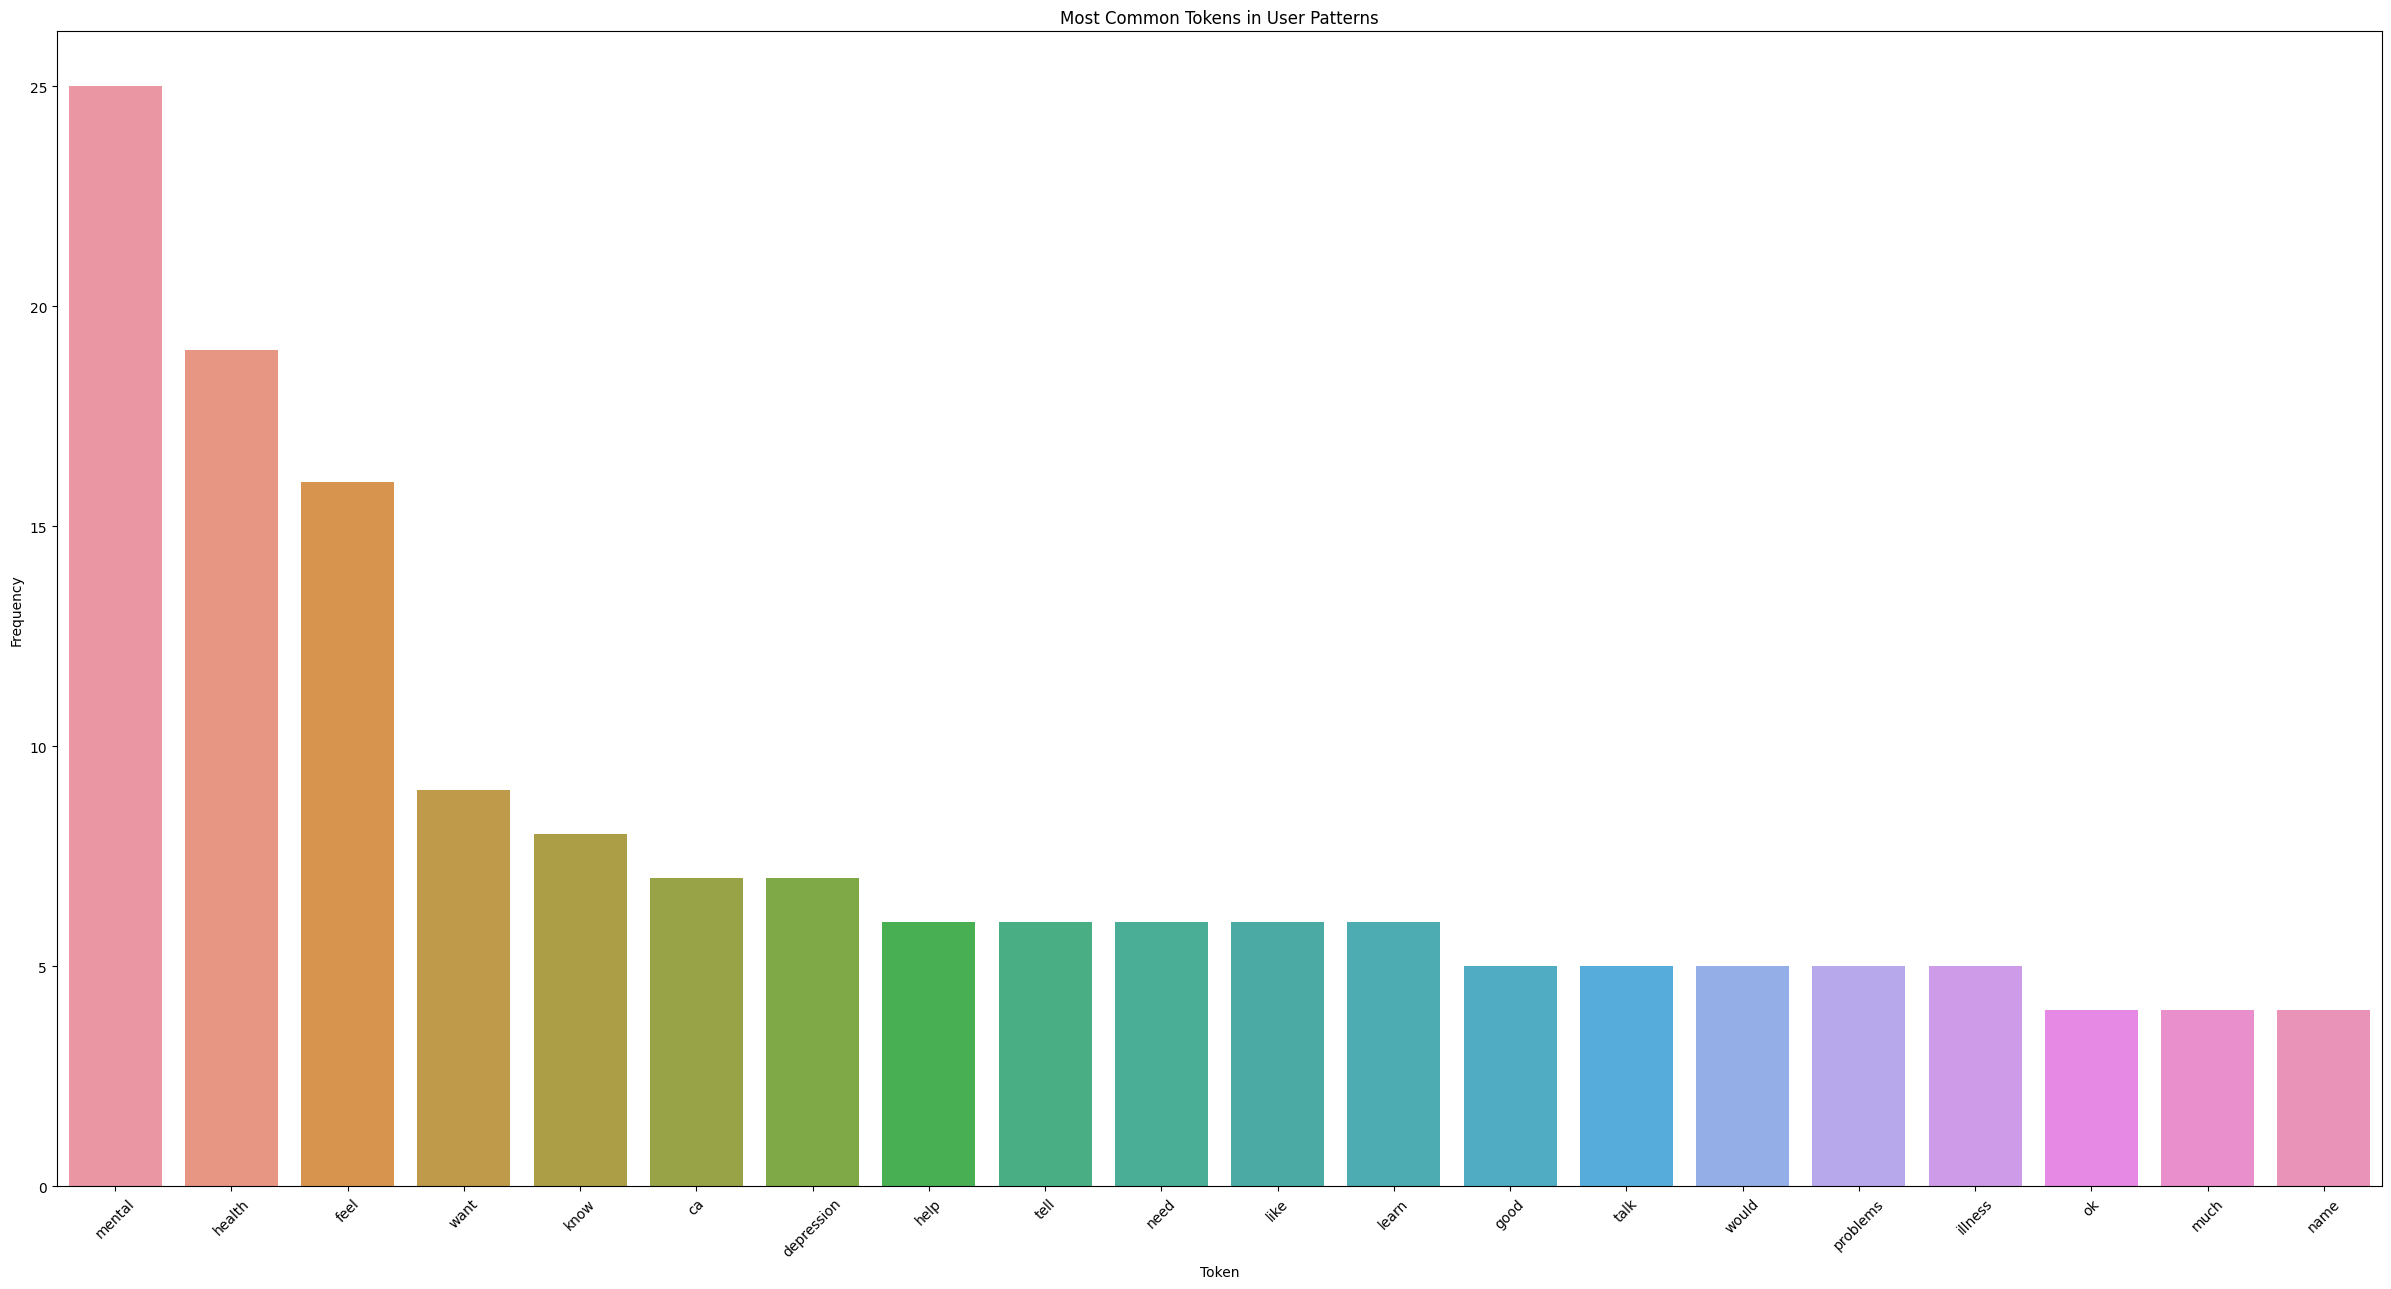

In [9]:
# Tokenize the text using nltk
all_tokens = [token for pattern in processed_patterns for token in pattern]

# Count the token frequencies
token_freq = Counter(all_tokens)
common_tokens = token_freq.most_common(20)  # Top 20 most common tokens

# Unzip the tokens and counts for visualization
tokens, counts = zip(*common_tokens)

# Visualize token frequency
plt.figure(figsize=(30, 15))
sns.barplot(x=list(tokens), y=list(counts))
plt.title("Most Common Tokens in User Patterns")
plt.ylabel("Frequency")
plt.xlabel("Token")
plt.xticks(rotation=45)
plt.show()

---
### ***Modelling***

In [10]:
import json
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer

# Load intents.json
with open('intents.json', 'r') as f:
    intents = json.load(f)

# Prepare dataset
texts = []
labels = []
label_to_id = {}
id_to_label = {}
for idx, intent in enumerate(intents['intents']):
    for pattern in intent['patterns']:
        texts.append(pattern)
        labels.append(intent['tag'])
    label_to_id[intent['tag']] = idx
    id_to_label[idx] = intent['tag']

# Convert labels to numeric form
numeric_labels = [label_to_id[label] for label in labels]

# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, numeric_labels, test_size=0.2, random_state=42)

# Tokenization using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_data(texts):
    return tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

train_encodings = tokenize_data(train_texts)
val_encodings = tokenize_data(val_texts)


c:\Users\Ayman\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [11]:
import torch

class IntentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = IntentDataset(train_encodings, train_labels)
val_dataset = IntentDataset(val_encodings, val_labels)


In [12]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_to_id))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",
    per_device_train_batch_size=128,
    per_device_eval_batch_size=128,
    num_train_epochs=200,
    learning_rate = 5e-5,
    lr_scheduler_type = 'cosine_with_min_lr',
    lr_scheduler_kwargs = {'min_lr': 1e-6},
    weight_decay=0.001,
)
# AdamW
# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Fine-tune model
trainer.train()


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

  0%|          | 0/400 [00:00<?, ?it/s]

C:\Users\Ayman\AppData\Local\Temp\ipykernel_20028\1774663591.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
c:\Users\Ayman\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 4.293318271636963, 'eval_runtime': 0.09, 'eval_samples_per_second': 522.353, 'eval_steps_per_second': 11.114, 'epoch': 1.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 4.26906681060791, 'eval_runtime': 0.0556, 'eval_samples_per_second': 845.963, 'eval_steps_per_second': 17.999, 'epoch': 2.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 4.2180891036987305, 'eval_runtime': 0.0572, 'eval_samples_per_second': 821.549, 'eval_steps_per_second': 17.48, 'epoch': 3.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 4.203182697296143, 'eval_runtime': 0.0559, 'eval_samples_per_second': 841.378, 'eval_steps_per_second': 17.902, 'epoch': 4.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 4.125573635101318, 'eval_runtime': 0.0602, 'eval_samples_per_second': 781.369, 'eval_steps_per_second': 16.625, 'epoch': 5.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 4.049535751342773, 'eval_runtime': 0.0586, 'eval_samples_per_second': 801.432, 'eval_steps_per_second': 17.052, 'epoch': 6.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 4.012543201446533, 'eval_runtime': 0.0581, 'eval_samples_per_second': 808.987, 'eval_steps_per_second': 17.212, 'epoch': 7.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 4.001498699188232, 'eval_runtime': 0.0584, 'eval_samples_per_second': 804.3, 'eval_steps_per_second': 17.113, 'epoch': 8.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.9647719860076904, 'eval_runtime': 0.0581, 'eval_samples_per_second': 808.519, 'eval_steps_per_second': 17.203, 'epoch': 9.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.8815758228302, 'eval_runtime': 0.058, 'eval_samples_per_second': 810.367, 'eval_steps_per_second': 17.242, 'epoch': 10.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.8091609477996826, 'eval_runtime': 0.059, 'eval_samples_per_second': 796.086, 'eval_steps_per_second': 16.938, 'epoch': 11.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.781602621078491, 'eval_runtime': 0.06, 'eval_samples_per_second': 783.533, 'eval_steps_per_second': 16.671, 'epoch': 12.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.7716073989868164, 'eval_runtime': 0.0559, 'eval_samples_per_second': 840.718, 'eval_steps_per_second': 17.888, 'epoch': 13.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.722590684890747, 'eval_runtime': 0.0583, 'eval_samples_per_second': 806.478, 'eval_steps_per_second': 17.159, 'epoch': 14.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.657470464706421, 'eval_runtime': 0.0599, 'eval_samples_per_second': 784.984, 'eval_steps_per_second': 16.702, 'epoch': 15.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.6053521633148193, 'eval_runtime': 0.0591, 'eval_samples_per_second': 794.856, 'eval_steps_per_second': 16.912, 'epoch': 16.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.578561305999756, 'eval_runtime': 0.0596, 'eval_samples_per_second': 789.16, 'eval_steps_per_second': 16.791, 'epoch': 17.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.549307346343994, 'eval_runtime': 0.0601, 'eval_samples_per_second': 781.806, 'eval_steps_per_second': 16.634, 'epoch': 18.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.508370876312256, 'eval_runtime': 0.0573, 'eval_samples_per_second': 820.349, 'eval_steps_per_second': 17.454, 'epoch': 19.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.458552598953247, 'eval_runtime': 0.0574, 'eval_samples_per_second': 818.989, 'eval_steps_per_second': 17.425, 'epoch': 20.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.4279141426086426, 'eval_runtime': 0.0593, 'eval_samples_per_second': 792.817, 'eval_steps_per_second': 16.868, 'epoch': 21.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.410053253173828, 'eval_runtime': 0.0608, 'eval_samples_per_second': 773.641, 'eval_steps_per_second': 16.46, 'epoch': 22.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.3433103561401367, 'eval_runtime': 0.0602, 'eval_samples_per_second': 781.26, 'eval_steps_per_second': 16.623, 'epoch': 23.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.298292398452759, 'eval_runtime': 0.0608, 'eval_samples_per_second': 772.456, 'eval_steps_per_second': 16.435, 'epoch': 24.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.2806639671325684, 'eval_runtime': 0.0601, 'eval_samples_per_second': 782.339, 'eval_steps_per_second': 16.646, 'epoch': 25.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.24605131149292, 'eval_runtime': 0.0587, 'eval_samples_per_second': 800.836, 'eval_steps_per_second': 17.039, 'epoch': 26.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.1805427074432373, 'eval_runtime': 0.0587, 'eval_samples_per_second': 800.882, 'eval_steps_per_second': 17.04, 'epoch': 27.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.123080253601074, 'eval_runtime': 0.0558, 'eval_samples_per_second': 842.417, 'eval_steps_per_second': 17.924, 'epoch': 28.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.092135190963745, 'eval_runtime': 0.0566, 'eval_samples_per_second': 830.881, 'eval_steps_per_second': 17.678, 'epoch': 29.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.0565786361694336, 'eval_runtime': 0.0586, 'eval_samples_per_second': 801.921, 'eval_steps_per_second': 17.062, 'epoch': 30.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 3.022146463394165, 'eval_runtime': 0.06, 'eval_samples_per_second': 783.599, 'eval_steps_per_second': 16.672, 'epoch': 31.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.9988887310028076, 'eval_runtime': 0.0601, 'eval_samples_per_second': 782.153, 'eval_steps_per_second': 16.642, 'epoch': 32.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.9538779258728027, 'eval_runtime': 0.0598, 'eval_samples_per_second': 786.45, 'eval_steps_per_second': 16.733, 'epoch': 33.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.9346556663513184, 'eval_runtime': 0.059, 'eval_samples_per_second': 796.349, 'eval_steps_per_second': 16.944, 'epoch': 34.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.9052233695983887, 'eval_runtime': 0.0587, 'eval_samples_per_second': 800.895, 'eval_steps_per_second': 17.04, 'epoch': 35.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.8659658432006836, 'eval_runtime': 0.0596, 'eval_samples_per_second': 788.99, 'eval_steps_per_second': 16.787, 'epoch': 36.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.817519187927246, 'eval_runtime': 0.0587, 'eval_samples_per_second': 800.001, 'eval_steps_per_second': 17.021, 'epoch': 37.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.790069818496704, 'eval_runtime': 0.0593, 'eval_samples_per_second': 792.068, 'eval_steps_per_second': 16.853, 'epoch': 38.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.7754344940185547, 'eval_runtime': 0.0596, 'eval_samples_per_second': 788.911, 'eval_steps_per_second': 16.785, 'epoch': 39.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.722374200820923, 'eval_runtime': 0.0574, 'eval_samples_per_second': 818.737, 'eval_steps_per_second': 17.42, 'epoch': 40.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.688368082046509, 'eval_runtime': 0.0592, 'eval_samples_per_second': 793.595, 'eval_steps_per_second': 16.885, 'epoch': 41.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.6688637733459473, 'eval_runtime': 0.0572, 'eval_samples_per_second': 821.039, 'eval_steps_per_second': 17.469, 'epoch': 42.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.6608686447143555, 'eval_runtime': 0.0592, 'eval_samples_per_second': 793.564, 'eval_steps_per_second': 16.884, 'epoch': 43.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.628899335861206, 'eval_runtime': 0.0576, 'eval_samples_per_second': 815.938, 'eval_steps_per_second': 17.36, 'epoch': 44.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.602501630783081, 'eval_runtime': 0.0579, 'eval_samples_per_second': 811.762, 'eval_steps_per_second': 17.272, 'epoch': 45.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.5796942710876465, 'eval_runtime': 0.0586, 'eval_samples_per_second': 801.931, 'eval_steps_per_second': 17.062, 'epoch': 46.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.5590312480926514, 'eval_runtime': 0.0583, 'eval_samples_per_second': 805.736, 'eval_steps_per_second': 17.143, 'epoch': 47.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.5114798545837402, 'eval_runtime': 0.0581, 'eval_samples_per_second': 809.405, 'eval_steps_per_second': 17.221, 'epoch': 48.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.466275691986084, 'eval_runtime': 0.0575, 'eval_samples_per_second': 817.62, 'eval_steps_per_second': 17.396, 'epoch': 49.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.4443182945251465, 'eval_runtime': 0.0582, 'eval_samples_per_second': 807.337, 'eval_steps_per_second': 17.177, 'epoch': 50.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.4476022720336914, 'eval_runtime': 0.0576, 'eval_samples_per_second': 815.783, 'eval_steps_per_second': 17.357, 'epoch': 51.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.4255194664001465, 'eval_runtime': 0.0558, 'eval_samples_per_second': 841.633, 'eval_steps_per_second': 17.907, 'epoch': 52.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.398573637008667, 'eval_runtime': 0.0586, 'eval_samples_per_second': 802.208, 'eval_steps_per_second': 17.068, 'epoch': 53.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.3822920322418213, 'eval_runtime': 0.0606, 'eval_samples_per_second': 775.263, 'eval_steps_per_second': 16.495, 'epoch': 54.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.3707547187805176, 'eval_runtime': 0.0596, 'eval_samples_per_second': 788.737, 'eval_steps_per_second': 16.782, 'epoch': 55.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.348726272583008, 'eval_runtime': 0.0596, 'eval_samples_per_second': 788.75, 'eval_steps_per_second': 16.782, 'epoch': 56.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.325547933578491, 'eval_runtime': 0.0606, 'eval_samples_per_second': 775.556, 'eval_steps_per_second': 16.501, 'epoch': 57.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.324697971343994, 'eval_runtime': 0.0587, 'eval_samples_per_second': 801.269, 'eval_steps_per_second': 17.048, 'epoch': 58.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.3200783729553223, 'eval_runtime': 0.0666, 'eval_samples_per_second': 705.44, 'eval_steps_per_second': 15.009, 'epoch': 59.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.283851385116577, 'eval_runtime': 0.058, 'eval_samples_per_second': 810.934, 'eval_steps_per_second': 17.254, 'epoch': 60.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.251918077468872, 'eval_runtime': 0.0595, 'eval_samples_per_second': 790.296, 'eval_steps_per_second': 16.815, 'epoch': 61.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.2448837757110596, 'eval_runtime': 0.059, 'eval_samples_per_second': 796.88, 'eval_steps_per_second': 16.955, 'epoch': 62.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.2327330112457275, 'eval_runtime': 0.0578, 'eval_samples_per_second': 812.692, 'eval_steps_per_second': 17.291, 'epoch': 63.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.223902702331543, 'eval_runtime': 0.0605, 'eval_samples_per_second': 777.47, 'eval_steps_per_second': 16.542, 'epoch': 64.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.229426383972168, 'eval_runtime': 0.0587, 'eval_samples_per_second': 801.204, 'eval_steps_per_second': 17.047, 'epoch': 65.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.221299409866333, 'eval_runtime': 0.0571, 'eval_samples_per_second': 822.948, 'eval_steps_per_second': 17.51, 'epoch': 66.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.20294189453125, 'eval_runtime': 0.0606, 'eval_samples_per_second': 776.026, 'eval_steps_per_second': 16.511, 'epoch': 67.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.1836063861846924, 'eval_runtime': 0.0588, 'eval_samples_per_second': 799.164, 'eval_steps_per_second': 17.003, 'epoch': 68.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.159888982772827, 'eval_runtime': 0.0633, 'eval_samples_per_second': 742.993, 'eval_steps_per_second': 15.808, 'epoch': 69.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.1575019359588623, 'eval_runtime': 0.0616, 'eval_samples_per_second': 763.156, 'eval_steps_per_second': 16.237, 'epoch': 70.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.1598849296569824, 'eval_runtime': 0.0927, 'eval_samples_per_second': 507.031, 'eval_steps_per_second': 10.788, 'epoch': 71.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.1567740440368652, 'eval_runtime': 0.0571, 'eval_samples_per_second': 822.989, 'eval_steps_per_second': 17.51, 'epoch': 72.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.151796340942383, 'eval_runtime': 0.0569, 'eval_samples_per_second': 825.986, 'eval_steps_per_second': 17.574, 'epoch': 73.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.1468682289123535, 'eval_runtime': 0.0598, 'eval_samples_per_second': 786.073, 'eval_steps_per_second': 16.725, 'epoch': 74.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.142534017562866, 'eval_runtime': 0.0652, 'eval_samples_per_second': 720.739, 'eval_steps_per_second': 15.335, 'epoch': 75.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.13283371925354, 'eval_runtime': 0.0915, 'eval_samples_per_second': 513.728, 'eval_steps_per_second': 10.93, 'epoch': 76.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.123650550842285, 'eval_runtime': 0.0601, 'eval_samples_per_second': 781.877, 'eval_steps_per_second': 16.636, 'epoch': 77.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.120633602142334, 'eval_runtime': 0.0592, 'eval_samples_per_second': 794.344, 'eval_steps_per_second': 16.901, 'epoch': 78.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.1184303760528564, 'eval_runtime': 0.0576, 'eval_samples_per_second': 816.083, 'eval_steps_per_second': 17.363, 'epoch': 79.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.1097965240478516, 'eval_runtime': 0.0539, 'eval_samples_per_second': 872.255, 'eval_steps_per_second': 18.559, 'epoch': 80.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0879218578338623, 'eval_runtime': 0.0587, 'eval_samples_per_second': 800.605, 'eval_steps_per_second': 17.034, 'epoch': 81.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0626227855682373, 'eval_runtime': 0.0587, 'eval_samples_per_second': 800.073, 'eval_steps_per_second': 17.023, 'epoch': 82.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0460126399993896, 'eval_runtime': 0.0607, 'eval_samples_per_second': 774.587, 'eval_steps_per_second': 16.481, 'epoch': 83.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0446770191192627, 'eval_runtime': 0.0577, 'eval_samples_per_second': 814.361, 'eval_steps_per_second': 17.327, 'epoch': 84.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0403428077697754, 'eval_runtime': 0.0597, 'eval_samples_per_second': 787.336, 'eval_steps_per_second': 16.752, 'epoch': 85.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0352916717529297, 'eval_runtime': 0.0602, 'eval_samples_per_second': 780.252, 'eval_steps_per_second': 16.601, 'epoch': 86.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.031503438949585, 'eval_runtime': 0.0576, 'eval_samples_per_second': 815.908, 'eval_steps_per_second': 17.36, 'epoch': 87.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.029845952987671, 'eval_runtime': 0.0588, 'eval_samples_per_second': 798.954, 'eval_steps_per_second': 16.999, 'epoch': 88.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0326905250549316, 'eval_runtime': 0.0573, 'eval_samples_per_second': 820.479, 'eval_steps_per_second': 17.457, 'epoch': 89.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0423707962036133, 'eval_runtime': 0.0594, 'eval_samples_per_second': 791.013, 'eval_steps_per_second': 16.83, 'epoch': 90.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.052560806274414, 'eval_runtime': 0.0586, 'eval_samples_per_second': 802.173, 'eval_steps_per_second': 17.068, 'epoch': 91.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.053086519241333, 'eval_runtime': 0.0591, 'eval_samples_per_second': 795.636, 'eval_steps_per_second': 16.928, 'epoch': 92.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.050895929336548, 'eval_runtime': 0.0592, 'eval_samples_per_second': 794.363, 'eval_steps_per_second': 16.901, 'epoch': 93.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0460517406463623, 'eval_runtime': 0.0581, 'eval_samples_per_second': 808.967, 'eval_steps_per_second': 17.212, 'epoch': 94.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.03792142868042, 'eval_runtime': 0.0583, 'eval_samples_per_second': 806.627, 'eval_steps_per_second': 17.162, 'epoch': 95.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.033597230911255, 'eval_runtime': 0.0588, 'eval_samples_per_second': 799.579, 'eval_steps_per_second': 17.012, 'epoch': 96.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0316402912139893, 'eval_runtime': 0.0582, 'eval_samples_per_second': 806.93, 'eval_steps_per_second': 17.169, 'epoch': 97.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.034928798675537, 'eval_runtime': 0.0587, 'eval_samples_per_second': 801.1, 'eval_steps_per_second': 17.045, 'epoch': 98.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.038078546524048, 'eval_runtime': 0.0581, 'eval_samples_per_second': 809.126, 'eval_steps_per_second': 17.215, 'epoch': 99.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0341668128967285, 'eval_runtime': 0.0578, 'eval_samples_per_second': 813.48, 'eval_steps_per_second': 17.308, 'epoch': 100.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.027397394180298, 'eval_runtime': 0.0591, 'eval_samples_per_second': 795.485, 'eval_steps_per_second': 16.925, 'epoch': 101.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0228421688079834, 'eval_runtime': 0.0571, 'eval_samples_per_second': 823.103, 'eval_steps_per_second': 17.513, 'epoch': 102.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.025099277496338, 'eval_runtime': 0.0591, 'eval_samples_per_second': 794.901, 'eval_steps_per_second': 16.913, 'epoch': 103.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.027512311935425, 'eval_runtime': 0.0581, 'eval_samples_per_second': 808.897, 'eval_steps_per_second': 17.211, 'epoch': 104.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0257794857025146, 'eval_runtime': 0.0586, 'eval_samples_per_second': 801.99, 'eval_steps_per_second': 17.064, 'epoch': 105.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.026825189590454, 'eval_runtime': 0.0561, 'eval_samples_per_second': 837.88, 'eval_steps_per_second': 17.827, 'epoch': 106.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0302436351776123, 'eval_runtime': 0.0576, 'eval_samples_per_second': 815.999, 'eval_steps_per_second': 17.362, 'epoch': 107.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0281035900115967, 'eval_runtime': 0.0597, 'eval_samples_per_second': 786.673, 'eval_steps_per_second': 16.738, 'epoch': 108.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.020986557006836, 'eval_runtime': 0.0594, 'eval_samples_per_second': 791.419, 'eval_steps_per_second': 16.839, 'epoch': 109.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.013186454772949, 'eval_runtime': 0.0581, 'eval_samples_per_second': 809.266, 'eval_steps_per_second': 17.218, 'epoch': 110.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.010424852371216, 'eval_runtime': 0.0591, 'eval_samples_per_second': 795.661, 'eval_steps_per_second': 16.929, 'epoch': 111.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0122292041778564, 'eval_runtime': 0.0581, 'eval_samples_per_second': 808.738, 'eval_steps_per_second': 17.207, 'epoch': 112.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0170881748199463, 'eval_runtime': 0.0583, 'eval_samples_per_second': 806.059, 'eval_steps_per_second': 17.15, 'epoch': 113.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.019510269165039, 'eval_runtime': 0.0582, 'eval_samples_per_second': 807.535, 'eval_steps_per_second': 17.182, 'epoch': 114.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.017740249633789, 'eval_runtime': 0.0588, 'eval_samples_per_second': 799.777, 'eval_steps_per_second': 17.017, 'epoch': 115.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.013512372970581, 'eval_runtime': 0.0584, 'eval_samples_per_second': 804.543, 'eval_steps_per_second': 17.118, 'epoch': 116.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0091161727905273, 'eval_runtime': 0.0581, 'eval_samples_per_second': 808.423, 'eval_steps_per_second': 17.2, 'epoch': 117.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.005281448364258, 'eval_runtime': 0.0557, 'eval_samples_per_second': 843.783, 'eval_steps_per_second': 17.953, 'epoch': 118.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0032577514648438, 'eval_runtime': 0.0582, 'eval_samples_per_second': 807.74, 'eval_steps_per_second': 17.186, 'epoch': 119.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0050911903381348, 'eval_runtime': 0.0581, 'eval_samples_per_second': 809.146, 'eval_steps_per_second': 17.216, 'epoch': 120.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.009727716445923, 'eval_runtime': 0.0581, 'eval_samples_per_second': 808.811, 'eval_steps_per_second': 17.209, 'epoch': 121.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0141441822052, 'eval_runtime': 0.0577, 'eval_samples_per_second': 814.627, 'eval_steps_per_second': 17.332, 'epoch': 122.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0174193382263184, 'eval_runtime': 0.0566, 'eval_samples_per_second': 830.538, 'eval_steps_per_second': 17.671, 'epoch': 123.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0205230712890625, 'eval_runtime': 0.059, 'eval_samples_per_second': 796.044, 'eval_steps_per_second': 16.937, 'epoch': 124.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0249199867248535, 'eval_runtime': 0.0576, 'eval_samples_per_second': 815.891, 'eval_steps_per_second': 17.359, 'epoch': 125.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.028292179107666, 'eval_runtime': 0.0576, 'eval_samples_per_second': 816.066, 'eval_steps_per_second': 17.363, 'epoch': 126.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.029141902923584, 'eval_runtime': 0.0583, 'eval_samples_per_second': 806.491, 'eval_steps_per_second': 17.159, 'epoch': 127.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0280601978302, 'eval_runtime': 0.0591, 'eval_samples_per_second': 795.742, 'eval_steps_per_second': 16.931, 'epoch': 128.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.026275634765625, 'eval_runtime': 0.0581, 'eval_samples_per_second': 808.827, 'eval_steps_per_second': 17.209, 'epoch': 129.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0242209434509277, 'eval_runtime': 0.0592, 'eval_samples_per_second': 793.701, 'eval_steps_per_second': 16.887, 'epoch': 130.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.022367000579834, 'eval_runtime': 0.0586, 'eval_samples_per_second': 801.523, 'eval_steps_per_second': 17.054, 'epoch': 131.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0212090015411377, 'eval_runtime': 0.0679, 'eval_samples_per_second': 691.77, 'eval_steps_per_second': 14.719, 'epoch': 132.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0207135677337646, 'eval_runtime': 0.1681, 'eval_samples_per_second': 279.597, 'eval_steps_per_second': 5.949, 'epoch': 133.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0211124420166016, 'eval_runtime': 0.0591, 'eval_samples_per_second': 795.405, 'eval_steps_per_second': 16.924, 'epoch': 134.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0199663639068604, 'eval_runtime': 0.0569, 'eval_samples_per_second': 825.298, 'eval_steps_per_second': 17.56, 'epoch': 135.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0179080963134766, 'eval_runtime': 0.0585, 'eval_samples_per_second': 804.011, 'eval_steps_per_second': 17.107, 'epoch': 136.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0160229206085205, 'eval_runtime': 0.0592, 'eval_samples_per_second': 794.52, 'eval_steps_per_second': 16.905, 'epoch': 137.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0138099193573, 'eval_runtime': 0.0602, 'eval_samples_per_second': 781.084, 'eval_steps_per_second': 16.619, 'epoch': 138.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0120668411254883, 'eval_runtime': 0.0587, 'eval_samples_per_second': 801.295, 'eval_steps_per_second': 17.049, 'epoch': 139.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0113017559051514, 'eval_runtime': 0.0606, 'eval_samples_per_second': 775.769, 'eval_steps_per_second': 16.506, 'epoch': 140.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.010810613632202, 'eval_runtime': 0.0603, 'eval_samples_per_second': 779.127, 'eval_steps_per_second': 16.577, 'epoch': 141.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.01145601272583, 'eval_runtime': 0.0592, 'eval_samples_per_second': 793.723, 'eval_steps_per_second': 16.888, 'epoch': 142.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0124330520629883, 'eval_runtime': 0.0604, 'eval_samples_per_second': 777.777, 'eval_steps_per_second': 16.548, 'epoch': 143.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0129952430725098, 'eval_runtime': 0.164, 'eval_samples_per_second': 286.631, 'eval_steps_per_second': 6.099, 'epoch': 144.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.012734889984131, 'eval_runtime': 0.176, 'eval_samples_per_second': 267.1, 'eval_steps_per_second': 5.683, 'epoch': 145.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0125725269317627, 'eval_runtime': 0.0602, 'eval_samples_per_second': 780.716, 'eval_steps_per_second': 16.611, 'epoch': 146.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0125420093536377, 'eval_runtime': 0.0582, 'eval_samples_per_second': 808.161, 'eval_steps_per_second': 17.195, 'epoch': 147.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.01186466217041, 'eval_runtime': 0.0586, 'eval_samples_per_second': 801.677, 'eval_steps_per_second': 17.057, 'epoch': 148.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0117621421813965, 'eval_runtime': 0.0593, 'eval_samples_per_second': 792.75, 'eval_steps_per_second': 16.867, 'epoch': 149.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0120561122894287, 'eval_runtime': 0.0553, 'eval_samples_per_second': 849.309, 'eval_steps_per_second': 18.07, 'epoch': 150.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0122594833374023, 'eval_runtime': 0.0588, 'eval_samples_per_second': 799.868, 'eval_steps_per_second': 17.018, 'epoch': 151.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0124258995056152, 'eval_runtime': 0.0579, 'eval_samples_per_second': 811.047, 'eval_steps_per_second': 17.256, 'epoch': 152.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.012643814086914, 'eval_runtime': 0.0586, 'eval_samples_per_second': 802.522, 'eval_steps_per_second': 17.075, 'epoch': 153.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0133538246154785, 'eval_runtime': 0.0594, 'eval_samples_per_second': 791.032, 'eval_steps_per_second': 16.83, 'epoch': 154.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.014172077178955, 'eval_runtime': 0.0543, 'eval_samples_per_second': 864.919, 'eval_steps_per_second': 18.403, 'epoch': 155.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0148329734802246, 'eval_runtime': 0.0582, 'eval_samples_per_second': 807.87, 'eval_steps_per_second': 17.189, 'epoch': 156.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.015106439590454, 'eval_runtime': 0.0578, 'eval_samples_per_second': 813.484, 'eval_steps_per_second': 17.308, 'epoch': 157.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.01529598236084, 'eval_runtime': 0.0582, 'eval_samples_per_second': 807.396, 'eval_steps_per_second': 17.179, 'epoch': 158.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0154292583465576, 'eval_runtime': 0.0584, 'eval_samples_per_second': 805.161, 'eval_steps_per_second': 17.131, 'epoch': 159.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.015270709991455, 'eval_runtime': 0.0571, 'eval_samples_per_second': 822.694, 'eval_steps_per_second': 17.504, 'epoch': 160.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.015385627746582, 'eval_runtime': 0.0586, 'eval_samples_per_second': 802.28, 'eval_steps_per_second': 17.07, 'epoch': 161.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.015028715133667, 'eval_runtime': 0.0603, 'eval_samples_per_second': 779.459, 'eval_steps_per_second': 16.584, 'epoch': 162.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0141096115112305, 'eval_runtime': 0.0588, 'eval_samples_per_second': 799.751, 'eval_steps_per_second': 17.016, 'epoch': 163.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0133683681488037, 'eval_runtime': 0.0607, 'eval_samples_per_second': 774.103, 'eval_steps_per_second': 16.47, 'epoch': 164.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0130066871643066, 'eval_runtime': 0.059, 'eval_samples_per_second': 795.98, 'eval_steps_per_second': 16.936, 'epoch': 165.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0128166675567627, 'eval_runtime': 0.0578, 'eval_samples_per_second': 812.461, 'eval_steps_per_second': 17.286, 'epoch': 166.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0126867294311523, 'eval_runtime': 0.0583, 'eval_samples_per_second': 806.363, 'eval_steps_per_second': 17.157, 'epoch': 167.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.012700080871582, 'eval_runtime': 0.0588, 'eval_samples_per_second': 798.818, 'eval_steps_per_second': 16.996, 'epoch': 168.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0129997730255127, 'eval_runtime': 0.0583, 'eval_samples_per_second': 805.651, 'eval_steps_per_second': 17.142, 'epoch': 169.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.013279914855957, 'eval_runtime': 0.0582, 'eval_samples_per_second': 807.522, 'eval_steps_per_second': 17.181, 'epoch': 170.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0137007236480713, 'eval_runtime': 0.0597, 'eval_samples_per_second': 787.1, 'eval_steps_per_second': 16.747, 'epoch': 171.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.013787031173706, 'eval_runtime': 0.0601, 'eval_samples_per_second': 782.038, 'eval_steps_per_second': 16.639, 'epoch': 172.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0137505531311035, 'eval_runtime': 0.0595, 'eval_samples_per_second': 789.65, 'eval_steps_per_second': 16.801, 'epoch': 173.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0135293006896973, 'eval_runtime': 0.0581, 'eval_samples_per_second': 808.894, 'eval_steps_per_second': 17.211, 'epoch': 174.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.013296127319336, 'eval_runtime': 0.0597, 'eval_samples_per_second': 787.068, 'eval_steps_per_second': 16.746, 'epoch': 175.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.013144016265869, 'eval_runtime': 0.0596, 'eval_samples_per_second': 788.561, 'eval_steps_per_second': 16.778, 'epoch': 176.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0131354331970215, 'eval_runtime': 0.0581, 'eval_samples_per_second': 809.213, 'eval_steps_per_second': 17.217, 'epoch': 177.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0132346153259277, 'eval_runtime': 0.0581, 'eval_samples_per_second': 808.99, 'eval_steps_per_second': 17.213, 'epoch': 178.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0132782459259033, 'eval_runtime': 0.0601, 'eval_samples_per_second': 782.165, 'eval_steps_per_second': 16.642, 'epoch': 179.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0130786895751953, 'eval_runtime': 0.0586, 'eval_samples_per_second': 802.28, 'eval_steps_per_second': 17.07, 'epoch': 180.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0129497051239014, 'eval_runtime': 0.0571, 'eval_samples_per_second': 823.522, 'eval_steps_per_second': 17.522, 'epoch': 181.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0127463340759277, 'eval_runtime': 0.0571, 'eval_samples_per_second': 823.268, 'eval_steps_per_second': 17.516, 'epoch': 182.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0127010345458984, 'eval_runtime': 0.0595, 'eval_samples_per_second': 789.777, 'eval_steps_per_second': 16.804, 'epoch': 183.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.012747049331665, 'eval_runtime': 0.0596, 'eval_samples_per_second': 789.119, 'eval_steps_per_second': 16.79, 'epoch': 184.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.012814998626709, 'eval_runtime': 0.0577, 'eval_samples_per_second': 814.098, 'eval_steps_per_second': 17.321, 'epoch': 185.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.012904167175293, 'eval_runtime': 0.0594, 'eval_samples_per_second': 790.949, 'eval_steps_per_second': 16.829, 'epoch': 186.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.01302433013916, 'eval_runtime': 0.058, 'eval_samples_per_second': 810.37, 'eval_steps_per_second': 17.242, 'epoch': 187.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0131304264068604, 'eval_runtime': 0.0598, 'eval_samples_per_second': 785.892, 'eval_steps_per_second': 16.721, 'epoch': 188.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.013389825820923, 'eval_runtime': 0.0584, 'eval_samples_per_second': 805.072, 'eval_steps_per_second': 17.129, 'epoch': 189.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0136263370513916, 'eval_runtime': 0.0594, 'eval_samples_per_second': 790.864, 'eval_steps_per_second': 16.827, 'epoch': 190.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0138370990753174, 'eval_runtime': 0.0576, 'eval_samples_per_second': 815.395, 'eval_steps_per_second': 17.349, 'epoch': 191.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.014055013656616, 'eval_runtime': 0.0588, 'eval_samples_per_second': 799.489, 'eval_steps_per_second': 17.01, 'epoch': 192.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0143134593963623, 'eval_runtime': 0.0576, 'eval_samples_per_second': 815.891, 'eval_steps_per_second': 17.359, 'epoch': 193.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0146236419677734, 'eval_runtime': 0.0575, 'eval_samples_per_second': 817.596, 'eval_steps_per_second': 17.396, 'epoch': 194.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.014979362487793, 'eval_runtime': 0.0595, 'eval_samples_per_second': 790.109, 'eval_steps_per_second': 16.811, 'epoch': 195.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0152621269226074, 'eval_runtime': 0.0569, 'eval_samples_per_second': 826.159, 'eval_steps_per_second': 17.578, 'epoch': 196.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0155251026153564, 'eval_runtime': 0.0589, 'eval_samples_per_second': 798.504, 'eval_steps_per_second': 16.989, 'epoch': 197.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.015737771987915, 'eval_runtime': 0.0598, 'eval_samples_per_second': 786.371, 'eval_steps_per_second': 16.731, 'epoch': 198.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.015868902206421, 'eval_runtime': 0.0632, 'eval_samples_per_second': 744.232, 'eval_steps_per_second': 15.835, 'epoch': 199.0}


C:\Users\Ayman\AppData\Local\Temp\ipykernel_20028\1774663591.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 2.0159783363342285, 'eval_runtime': 0.1775, 'eval_samples_per_second': 264.809, 'eval_steps_per_second': 5.634, 'epoch': 200.0}
{'train_runtime': 178.485, 'train_samples_per_second': 207.3, 'train_steps_per_second': 2.241, 'train_loss': 0.7349471282958985, 'epoch': 200.0}


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : ./results
COMET INFO:     url                   : https://www.comet.com/aymansab0/general/0056c096eec544ff903d329ca5780534
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     epoch [201]                    : (1.0, 200.0)
COMET INFO:     eval/loss [200]                : (2.0032577514648438, 4.293318271636963)
COMET INFO:     eval/runtime [200]             : (0.0539, 0.1775)
COMET INFO:     eval/samples_per_second [200]  : (264.809, 872.255)
COMET INFO:     eval/steps_per_second [200]    : (5.634, 18.559)
COMET INFO:     eval_loss [200]                : (2.0032577514648438, 4.293318271636963)
COMET INFO:     eval_runtime [200]             : (0.05

TrainOutput(global_step=400, training_loss=0.7349471282958985, metrics={'train_runtime': 178.485, 'train_samples_per_second': 207.3, 'train_steps_per_second': 2.241, 'total_flos': 494707222464000.0, 'train_loss': 0.7349471282958985, 'epoch': 200.0})

In [13]:
# Ensure you move the model to the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [14]:
def predict_intent(text):
    # Tokenize the input text and move it to the same device as the model
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)
    
    # Perform the forward pass with all tensors on the same device
    outputs = model(**inputs)
    
    # Get the logits and apply softmax
    probs = outputs.logits.softmax(dim=1)
    
    # Get the predicted label (numeric)
    predicted_label = probs.argmax().item()
    
    # Convert the numeric label back to the string tag
    predicted_intent = id_to_label[predicted_label]
    
    return predicted_intent

def get_response(intent):
    for intent_data in intents['intents']:
        if intent_data['tag'] == intent:
            return intent_data['responses'][0]  # Pick a response
    return "Sorry, I don't understand."

def mental_health_chatbot():
    print("Hello, I'm Pandora, your mental health assistant. How can I help you today? (Type 'quit' to exit)\n")
    
    while True:
        # Get user input
        user_input = input("You: ")
        print("\nUser Input:", user_input)
        # Check if the user wants to quit
        if user_input.lower() == 'quit':
            print("Pandora: Goodbye! Take care.")
            break
        
        # Predict the intent of the user input
        intent = predict_intent(user_input)
        print(f"\nPredicted intent: {intent}")  # Debugging purposes, you can remove this line if not needed
        
        # Get a response based on the predicted intent
        response = get_response(intent)
        
        # Display the chatbot response
        print(f"\nPandora: {response}")

In [15]:
# Start the chatbot loop
mental_health_chatbot()

Hello, I'm Pandora, your mental health assistant. How can I help you today? (Type 'quit' to exit)


User Input: Hi there

Predicted intent: greeting

Pandora: Hello there. Tell me how are you feeling today?

User Input: I have a girlfriend

Predicted intent: friends

Pandora: I'm sorry to hear that. Just know that I'm here for you. Talking about it might help. Why do you think you don't have any friends?

User Input: my friend hates me

Predicted intent: hate-me

Pandora: Why do you think so?

User Input: he punched me

Predicted intent: hate-me

Pandora: Why do you think so?

User Input: He screams

Predicted intent: scared

Pandora: It's only natural to feel this way. I'm here for you.

User Input: I love her

Predicted intent: happy

Pandora: That's geat to hear. I'm glad you're feeling this way.

User Input: I hate that

Predicted intent: hate-me

Pandora: Why do you think so?

User Input: what are you?

Predicted intent: about

Pandora: I'm Pandora, your Personal Therapeutic AI As

In [16]:
# print all 'tags' in json file
tags = [intent['tag'] for intent in data['intents']]
print(tags)

['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye', 'thanks', 'no-response', 'neutral-response', 'about', 'skill', 'creation', 'name', 'help', 'sad', 'stressed', 'worthless', 'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep', 'scared', 'death', 'understand', 'done', 'suicide', 'hate-you', 'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid', 'location', 'something-else', 'friends', 'ask', 'problem', 'no-approach', 'learn-more', 'user-agree', 'meditation', 'user-meditation', 'pandora-useful', 'user-advice', 'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2', 'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9', 'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15', 'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21', 'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27', 'fact-28', 'fact-29', 'fact-30', 'fact-31', 'fact-32']


In [17]:
# Save the model
model_path = "./saved_model"
model.save_pretrained(model_path)

# Save the tokenizer
tokenizer_path = "./saved_tokenizer"
tokenizer.save_pretrained(tokenizer_path)

('./saved_tokenizer\\tokenizer_config.json',
 './saved_tokenizer\\special_tokens_map.json',
 './saved_tokenizer\\vocab.txt',
 './saved_tokenizer\\added_tokens.json')